In [34]:
# Se importan las librerías necesarias para el desarrollo del proyecto

import pandas as pd  # Se utiliza para trabajar con datos en forma de tablas y analizarlos
import matplotlib.pyplot as plt  # Se emplea para crear gráficos
import seaborn as sns  # Facilita la creación de gráficos más visuales y personalizados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report


In [35]:
url = r"https://raw.githubusercontent.com/LauraCaipa02/Telecom-X---An-lisis-de-Evasi-n-de-Clientes/refs/heads/main/df_data_telecomX.csv"

In [36]:
df_telecomX = pd.read_csv(url)
df_telecomX.head()


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [37]:
df_telecomX["Churn"].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [38]:
X = df_telecomX.drop(columns="Churn", axis=1)
y = df_telecomX["Churn"]

In [39]:
over = SMOTE()
under = NearMiss(version= 3)

In [40]:
xbal_over, ybal_over = over.fit_resample(X,y)
xbal_under, ybal_under = under.fit_resample(X,y)

xbal_overN, ybal_overN = over.fit_resample(X,y)
xbal_underN, ybal_underN = under.fit_resample(X,y)




In [41]:
df_float_telecomX = [col for col in df_telecomX.columns if df_telecomX[col].dtypes == "float64"]
df_float_telecomX

['account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias']

In [42]:
scaler = MinMaxScaler()
xbal_overN[df_float_telecomX] = scaler.fit_transform(xbal_over[df_float_telecomX])
xbal_underN[df_float_telecomX] = scaler.fit_transform(xbal_under[df_float_telecomX])


In [43]:
xbal_underN

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,72,1,1,1.000000,0.998575,1.000000,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,1,72,1,0,0.987494,0.998304,0.987494,...,0,0,1,0,0,1,0,1,0,0
2,1,0,1,0,72,1,1,0.981991,0.989568,0.981991,...,0,0,1,0,0,1,0,1,0,0
3,1,0,1,0,72,1,1,0.918459,0.916616,0.918459,...,0,0,1,0,0,1,0,1,0,0
4,1,0,1,1,72,1,1,0.915458,0.917159,0.915458,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,1,0,0,21,1,1,0.780390,0.232110,0.780390,...,0,0,1,1,0,0,1,0,0,0
3734,1,1,0,0,9,1,1,0.650825,0.089004,0.650825,...,0,0,1,1,0,0,0,0,1,0
3735,0,0,0,0,1,1,1,0.513757,0.005920,0.513757,...,1,0,0,1,0,0,0,0,0,1
3736,0,0,0,0,4,1,0,0.021511,0.007691,0.021511,...,0,1,0,1,0,0,1,0,0,0


In [44]:
# Calcula la matriz de correlación entre las columnas numéricas del DataFrame

correlacion = df_telecomX.corr()

# Muestra la matriz de correlación resultante
correlacion

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
Churn,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,...,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773
customer.gender,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,...,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
customer.SeniorCitizen,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,...,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
customer.Partner,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,...,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
customer.Dependents,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,...,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
customer.tenure,-0.354049,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,...,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
phone.PhoneService,0.011691,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,...,-0.111273,0.171817,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
account.PaperlessBilling,0.191454,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,...,0.058987,-0.320592,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981
account.Charges.Monthly,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,...,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568
account.Charges.Total,-0.199484,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,...,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708


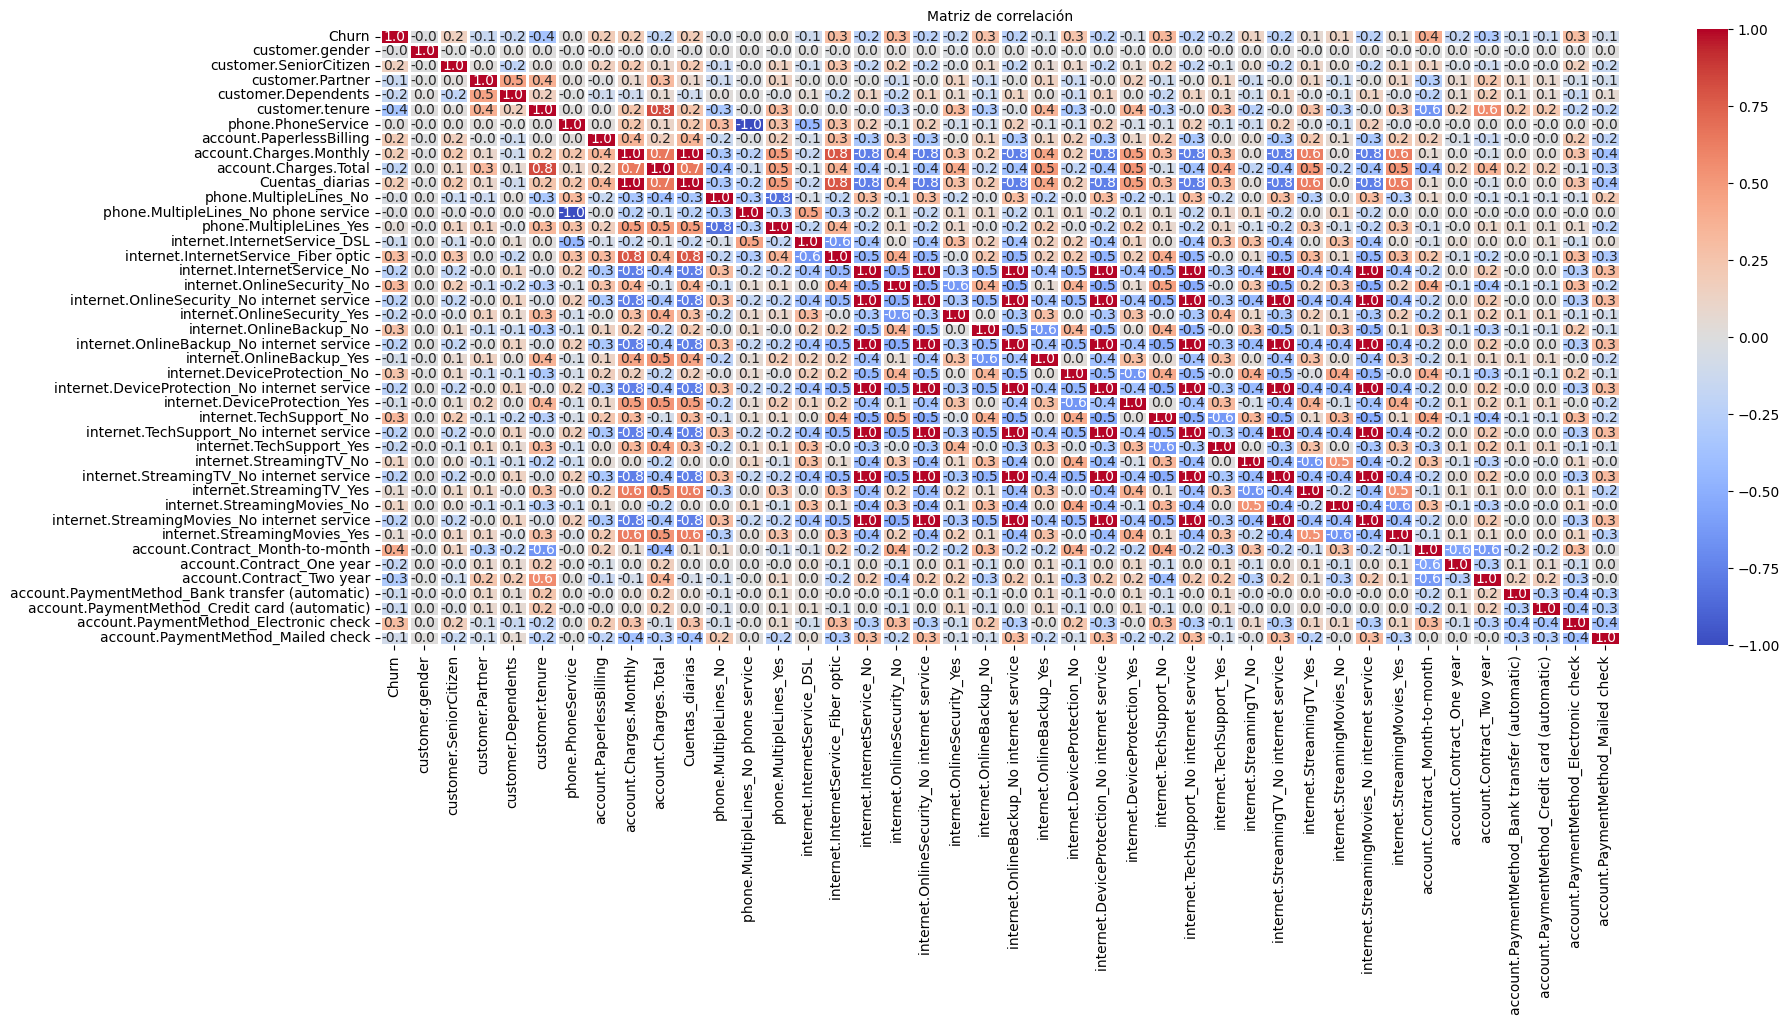

In [45]:
plt.figure(figsize=(20,8))  
# Crea una figura de tamaño 10x8 pulgadas para el gráfico

sns.heatmap(
    correlacion,          # Datos: matriz de correlación calculada previamente
    annot=True,           # Muestra los valores numéricos dentro de cada celda
    cmap='coolwarm',      # Paleta de colores que va de tonos fríos a cálidos para representar valores negativos y positivos
    fmt=".1f",            # Formato de los números con dos decimales
    linewidths=1        # Grosor de las líneas que separan las celdas del mapa de calor
)

plt.title("Matriz de correlación", fontsize=10);  
# Añade un título al gráfico con tamaño de fuente 16

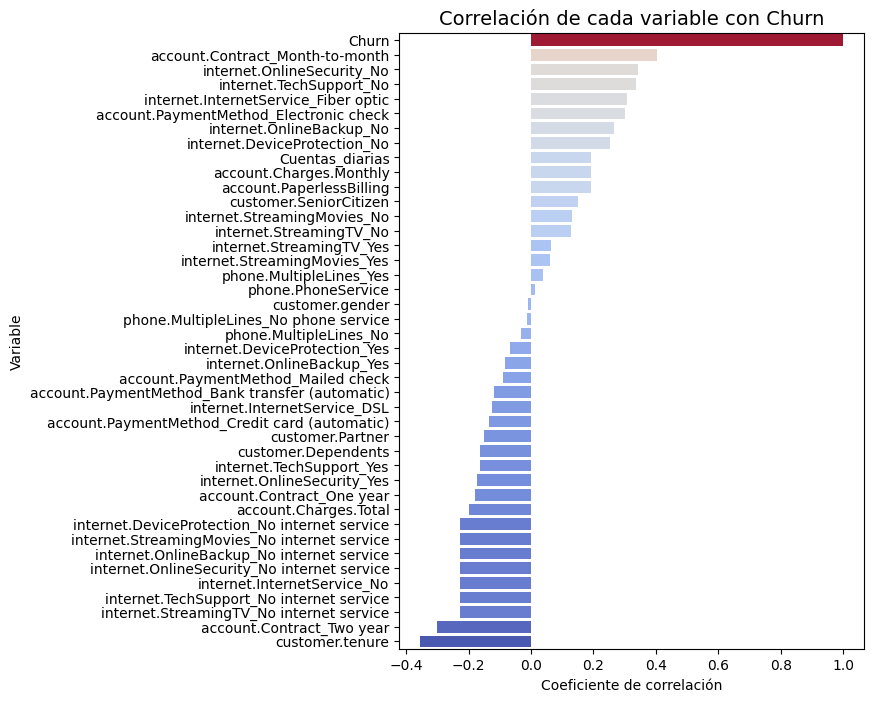

In [46]:
# --- Correlación con Churn ---
plt.figure(figsize=(6,8))
churn_corr = correlacion["Churn"].sort_values(ascending=False)
sns.barplot(x=churn_corr.values,
            y=churn_corr.index, 
            palette="coolwarm",
            hue=churn_corr.values,
            legend=False)
plt.title("Correlación de cada variable con Churn", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable");

C:\Users\laura\AppData\Local\Temp\ipykernel_29348\1378152533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer.tenure", data=df_telecomX, palette="Set2")
C:\Users\laura\AppData\Local\Temp\ipykernel_29348\1378152533.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Total", data=df_telecomX, palette="Set2")


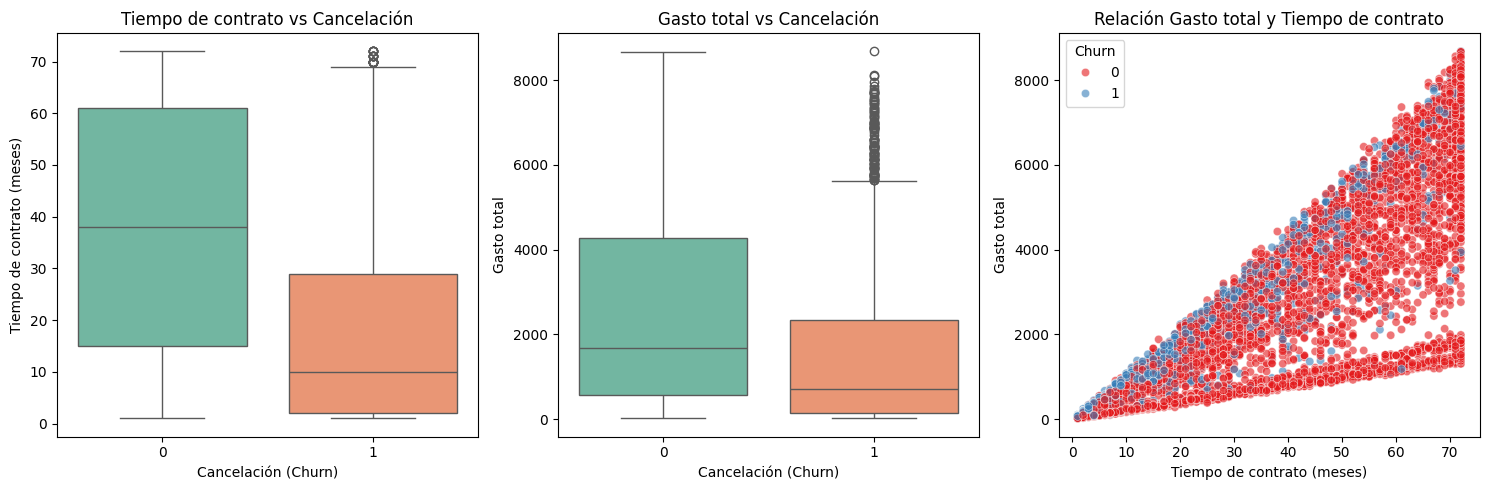

In [47]:
plt.figure(figsize=(15, 5))

# 1. Tiempo de contrato × Cancelación (Boxplot)
plt.subplot(1, 3, 1)
sns.boxplot(x="Churn", y="customer.tenure", data=df_telecomX, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Tiempo de contrato (meses)")

# 2. Gasto total × Cancelación (Boxplot)
plt.subplot(1, 3, 2)
sns.boxplot(x="Churn", y="account.Charges.Total", data=df_telecomX, palette="Set2")
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Gasto total")

# 3. Relación Gasto total vs Tiempo de contrato (Scatter)
plt.subplot(1, 3, 3)
sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue="Churn", data=df_telecomX, alpha=0.6, palette="Set1")
plt.title("Relación Gasto total y Tiempo de contrato")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")

plt.tight_layout()
plt.show()

In [48]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(xbal_over, ybal_over, train_size=0.8,random_state=5, stratify=ybal_over)
X_O, X_valO, y_O, y_valO = train_test_split(xbal_over, ybal_over, random_state=5, stratify=ybal_over)

X_trainON, X_testON, y_trainON, y_testON = train_test_split(xbal_overN, ybal_overN, train_size=0.8,random_state=5, stratify=ybal_overN)
X_ON, X_valON, y_ON, y_valON = train_test_split(xbal_overN, ybal_overN,random_state=5, stratify=ybal_overN)

X_trainU, X_testU, y_trainU, y_testU = train_test_split(xbal_under, ybal_under, train_size=0.8,random_state=5, stratify=ybal_under)
X_U, X_valU, y_U, y_valU = train_test_split(xbal_under, ybal_under, random_state=5, stratify=ybal_under)

X_trainUN, X_testUN, y_trainUN, y_testUN = train_test_split(xbal_underN, ybal_underN, train_size=0.8,random_state=5,stratify=ybal_underN)
X_UN, X_valUN, y_UN, y_valUN = train_test_split(xbal_underN, ybal_underN, random_state=5,stratify=ybal_underN)

In [49]:
modeloRLO = LogisticRegression()
modeloRLU = LogisticRegression()

modeloRLO.fit(X_trainON,y_trainON)
modeloRLU.fit(X_trainUN,y_trainUN)


c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
modeloRFO = RandomForestClassifier(max_depth=10)
modeloRFU = RandomForestClassifier(max_depth=10)

modeloRFO.fit(X_trainO, y_trainO)
modeloRFU.fit(X_trainU, y_trainU)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


La exactitud del modelo de Regresión Logística con oversampling y datos normalizados en el conjunto de entrenamiento es:0.8509685230024213
Precisión: 0.8603032562764107
Recall: 0.8380145278450363
F1-score: 0.8490126333864835

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4130
           1       0.86      0.84      0.85      4130

    accuracy                           0.85      8260
   macro avg       0.85      0.85      0.85      8260
weighted avg       0.85      0.85      0.85      8260

La exactitud del modelo de Regresión Logística con oversampling y datos normalizados en el conjunto de validación es:0.8489542989930287
Precisión: 0.8566904196357878
Recall: 0.8381099922540666
F1-score: 0.8472983555207517

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1291
           1       0.86      0.84      0.85      1291

    accu

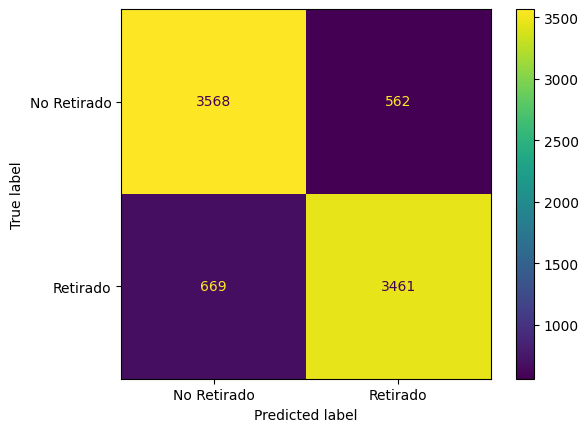

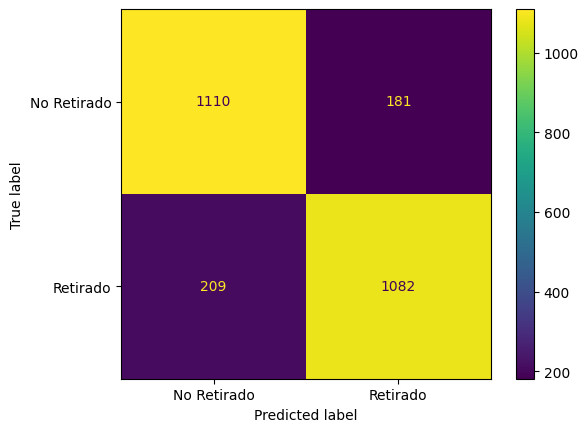

In [ ]:
print(f'La exactitud del modelo de Regresión Logística con oversample y datos normalizados en el conjunto de entrenamiento es:{modeloRLO.score(X_trainON,y_trainON)}')

yON_train = modeloRLO.predict(X_trainON)

print("Precisión:", precision_score(y_trainON, yON_train))
print("Recall:", recall_score(y_trainON, yON_train))
print("F1-score:", f1_score(y_trainON, yON_train))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_trainON, yON_train))

matrizTCRLO = confusion_matrix(y_trainON, yON_train)
graficoTMRLO = ConfusionMatrixDisplay(confusion_matrix=matrizTCRLO,display_labels=["No Retirado","Retirado"])
graficoTMRLO.plot();

print(f'La exactitud del modelo de Regresión Logística con oversample y datos normalizados en el conjunto de validación es:{modeloRLO.score(X_valON,y_valON)}')

yON_predict = modeloRLO.predict(X_valON)

print("Precisión:", precision_score(y_valON, yON_predict))
print("Recall:", recall_score(y_valON, yON_predict))
print("F1-score:", f1_score(y_valON, yON_predict))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_valON, yON_predict))

matrizVCRLO = confusion_matrix(y_valON, yON_predict)
graficoVMRLO = ConfusionMatrixDisplay(confusion_matrix=matrizVCRLO,display_labels=["No Retirado","Retirado"])
graficoVMRLO.plot();

La excatitud del modelo de Regresión logistica con balanceo de datos undersample y la data normalizada en el conjunto de entrenamiento es: 0.697324414715719
Precisión: 0.6735294117647059
Recall: 0.7658862876254181
F1-score: 0.7167449139280125

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1495
           1       0.67      0.77      0.72      1495

    accuracy                           0.70      2990
   macro avg       0.70      0.70      0.70      2990
weighted avg       0.70      0.70      0.70      2990

La excatitud del modelo de Regresión logistica con balanceo de datos undersample y la data normalizada en el conjunto de validación es: 0.7101604278074867
Precisión: 0.6997971602434077
Recall: 0.7371794871794872
F1-score: 0.7180020811654526

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       467
           1       0.70   

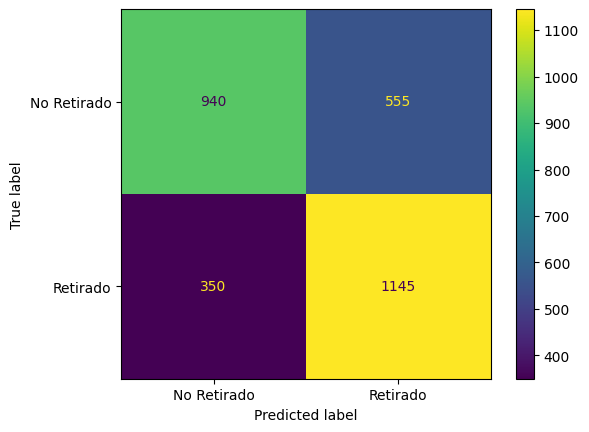

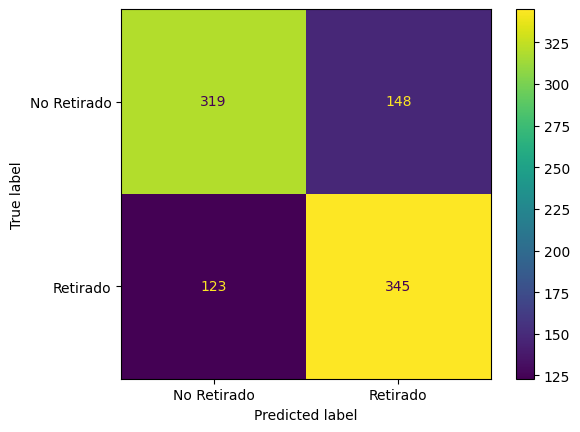

In [52]:
print(f'La excatitud del modelo de Regresión logistica con balanceo de datos undersample y la data normalizada en el conjunto de entrenamiento es: {modeloRLU.score(X_trainUN,y_trainUN)}')

yUN_train = modeloRLU.predict(X_trainUN)
matrizTCRLU = confusion_matrix(y_trainUN, yUN_train)
graficoTMRLU = ConfusionMatrixDisplay(confusion_matrix=matrizTCRLU,display_labels=["No Retirado","Retirado"])
graficoTMRLU.plot();

print("Precisión:", precision_score(y_trainUN, yUN_train))
print("Recall:", recall_score(y_trainUN, yUN_train))
print("F1-score:", f1_score(y_trainUN, yUN_train))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_trainUN, yUN_train))

print(f'La excatitud del modelo de Regresión logistica con balanceo de datos undersample y la data normalizada en el conjunto de validación es: {modeloRLU.score(X_valUN,y_valUN)}')

yUN_predict = modeloRLU.predict(X_valUN)
matrizVCRLU = confusion_matrix(y_valUN, yUN_predict)
graficoVMRLU = ConfusionMatrixDisplay(confusion_matrix=matrizVCRLU,display_labels=["No Retirado","Retirado"])
graficoVMRLU.plot();

print("Precisión:", precision_score(y_valUN, yUN_predict))
print("Recall:", recall_score(y_valUN, yUN_predict))
print("F1-score:", f1_score(y_valUN, yUN_predict))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_valUN, yUN_predict))

La excatitud del modelo de bosques aleatorios con balanceo de datos oversample en el conjunto de entrenamiento es: 0.8966101694915254
Precisión: 0.8715970961887477
Recall: 0.9302663438256659
F1-score: 0.8999765753103771

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4130
           1       0.87      0.93      0.90      4130

    accuracy                           0.90      8260
   macro avg       0.90      0.90      0.90      8260
weighted avg       0.90      0.90      0.90      8260

La excatitud del modelo de bosques aleatorios con balanceo de datos oversample en el conjunto de validación es: 0.8528272656855151
Precisión: 0.8336996336996337
Recall: 0.8814872192099148
F1-score: 0.8569277108433735

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1291
           1       0.83      0.88      0.86      1291

    accuracy      

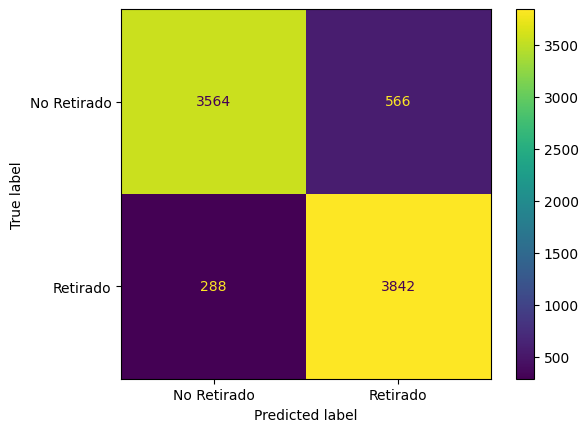

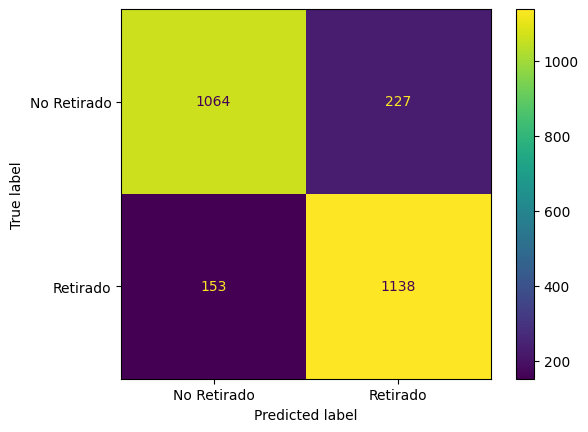

In [53]:
print(f'La excatitud del modelo de bosques aleatorios con balanceo de datos oversample en el conjunto de entrenamiento es: {modeloRFO.score(X_trainO, y_trainO)}')

yO_train = modeloRFO.predict(X_trainO)
matrizCRFO = confusion_matrix(y_trainO, yO_train)
graficoMRFO = ConfusionMatrixDisplay(confusion_matrix=matrizCRFO,display_labels=["No Retirado","Retirado"])
graficoMRFO.plot();

print("Precisión:", precision_score(y_trainO, yO_train))
print("Recall:", recall_score(y_trainO, yO_train))
print("F1-score:", f1_score(y_trainO, yO_train))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_trainO, yO_train))


print(f'La excatitud del modelo de bosques aleatorios con balanceo de datos oversample en el conjunto de validación es: {modeloRFO.score(X_valO, y_valO)}')

yO_predict = modeloRFO.predict(X_valO)
matrizCRFO = confusion_matrix(y_valO, yO_predict)
graficoMRFO = ConfusionMatrixDisplay(confusion_matrix=matrizCRFO,display_labels=["No Retirado","Retirado"])
graficoMRFO.plot();

print("Precisión:", precision_score(y_valO, yO_predict))
print("Recall:", recall_score(y_valO, yO_predict))
print("F1-score:", f1_score(y_valO, yO_predict))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_valO, yO_predict))

La excatitud del modelo de Bosques aleatorios con balanceo de datos undersample en el conjunto de entrenamiento es: 0.8759197324414716
Precisión: 0.7633928571428571
Recall: 0.8006688963210702
F1-score: 0.781586679725759

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1495
           1       0.76      0.80      0.78      1495

    accuracy                           0.78      2990
   macro avg       0.78      0.78      0.78      2990
weighted avg       0.78      0.78      0.78      2990

La excatitud del modelo de Bosques aleatorios con balanceo de datos undersample en el conjunto de validación es: 0.7529411764705882
Precisión: 0.7907488986784141
Recall: 0.7670940170940171
F1-score: 0.7787418655097614

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       467
           1       0.79      0.77      0.78       468

    accuracy     

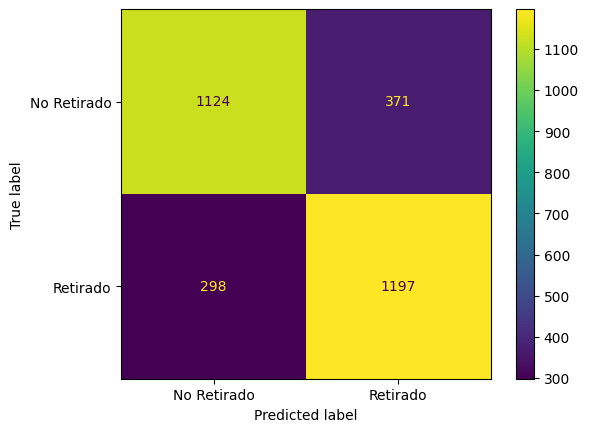

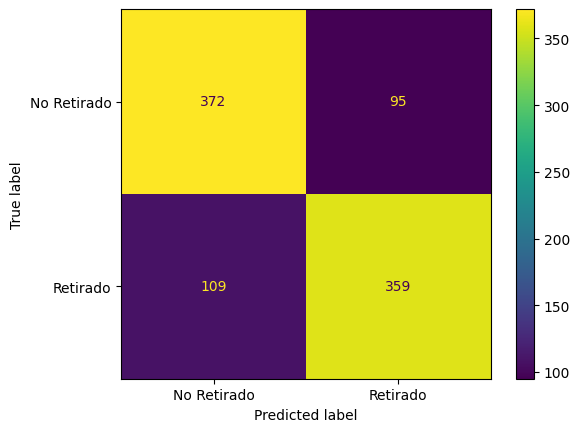

In [55]:
print(f'La excatitud del modelo de Bosques aleatorios con balanceo de datos undersample en el conjunto de entrenamiento es: {modeloRFU.score(X_trainU, y_trainU)}')

yU_train = modeloRFO.predict(X_trainU)
matrizCRFU = confusion_matrix(y_trainU, yU_train)
graficoMRFU = ConfusionMatrixDisplay(confusion_matrix=matrizCRFU,display_labels=["No Retirado","Retirado"])
graficoMRFU.plot();

print("Precisión:", precision_score(y_trainU, yU_train))
print("Recall:", recall_score(y_trainU, yU_train))
print("F1-score:", f1_score(y_trainU, yU_train))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_trainU, yU_train))

print(f'La excatitud del modelo de Bosques aleatorios con balanceo de datos undersample en el conjunto de validación es: {modeloRFU.score(X_valU, y_valU)}')

yU_predict = modeloRFO.predict(X_valU)
matrizCRFU = confusion_matrix(y_valU, yU_predict)
graficoMRFU = ConfusionMatrixDisplay(confusion_matrix=matrizCRFU,display_labels=["No Retirado","Retirado"])
graficoMRFU.plot();

print("Precisión:", precision_score(y_valU, yU_predict))
print("Recall:", recall_score(y_valU, yU_predict))
print("F1-score:", f1_score(y_valU, yU_predict))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_valU, yU_predict))

## Modelo Regresión Logística con Oversampling 
	•	Score (val): 0.8494
	•	Precision: 0.8566
	•	Recall: 0.8381
	•	F1-score: 0.8472

Resulto muy balanceado, no hay gran diferencia entre precisión y recall, lo que hace que el F1 sea muy alto y consistente entre el entrenamiento y la validación.

## Modelo Regresión Logística con Undersampling
	•	Score (val): 0.7101
	•	Precision: 0.6997
	•	Recall: 0.7371
	•	F1-score: 0.7180

Más bajo en todas las mediciones . Al reducir datos con undersampling, el modelo pierde información y cae el rendimiento.

⸻

## Modelo Random Forest con Oversampling 
	•	Score (val): 0.8528
	•	Precision: 0.8336
	•	Recall: 0.8814
	•	F1-score: 0.8569

En este el recall es más alto que en la regresión logística, lo que significa que detecta mejor los positivos. El F1 también está ligeramente por encima.

## Modelo Undersampling – Random Forest
	•	Score (val): 0.7529
	•	Precision: 0.7907
	•	Recall: 0.7670
	•	F1-score: 0.7787

Mejor que la regresión logística con undersampling, pero aún así por debajo de los modelos con oversampling.

## Conclusiones
	- Con Oversampling la data que se tiene funciona mejor que con undersampling, ya que mantiene la información y no la recorta.
	- Random Forest con oversampling es el mejor modelo, tiene el mayor recall y mejor F1-score, lo cual significa que equilibra muy bien precisión y sensibilidad.

In [59]:
importances = pd.DataFrame({
    "Variable": X_valO.columns,
    "Importancia": modeloRFO.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importances.head(10))  # Mostrar las 5 más importantes

                                Variable  Importancia
4                        customer.tenure     0.096751
18           internet.OnlineSecurity_Yes     0.077645
8                  account.Charges.Total     0.074796
36             account.Contract_Two year     0.069319
34       account.Contract_Month-to-month     0.067405
27              internet.TechSupport_Yes     0.049128
7                account.Charges.Monthly     0.044230
9                        Cuentas_diarias     0.041768
35             account.Contract_One year     0.040367
14  internet.InternetService_Fiber optic     0.038730


### Análisis de las variables más importantes en el modelo Random Forest con oversampling, sin normalizar la data

### Interpretación de las variables principales

1. **customer.tenure** → El tiempo de permanencia del cliente es el predictor más fuerte: a menor antigüedad, mayor probabilidad de churn.  
2. **internet.OnlineSecurity_Yes** → Los clientes con seguridad en línea tienden a quedarse más tiempo.  
3. **account.Charges.Total** → El gasto acumulado refleja valor y compromiso del cliente.  
4. **Tipo de contrato** → Contratos de dos años reducen significativamente la cancelación, mientras que contratos mensuales aumentan el riesgo.  
5. **internet.TechSupport_Yes** → El soporte técnico adicional ayuda a disminuir el churn.  
6. **account.Charges.Monthly** → Un mayor gasto mensual puede estar relacionado con mayor probabilidad de cancelación.  
7. **Cuentas_diarias** → El nivel de uso o interacción con el servicio es un buen indicador de fidelidad.  
8. **internet.InternetService_Fiber optic** → Los clientes con fibra óptica presentan diferentes patrones de cancelación, posiblemente asociados a precios más altos.


# Informe Final - Cancelación de Clientes (Churn)


El análisis realizado con diferentes modelos de clasificación, particularmente con Random Forest, permitió identificar las variables más influyentes en la cancelación de clientes (churn).
De las 41 variables originales, se destacan 10 con mayor impacto, lo que brinda una visión clara de los factores que afectan la permanencia de los usuarios.

El rendimiento del modelo muestra una buena capacidad predictiva, lo que nos da confianza para utilizar los resultados en la generación de estrategias de retención.

2. Principales factores que influyen en la cancelación

Según la importancia de las variables en el modelo, los factores más relevantes son:

Tiempo de permanencia del cliente (tenure)

Los clientes con menor antigüedad presentan un mayor riesgo de cancelación.

Indica que los primeros meses de la relación con la empresa son críticos para la fidelización.

Seguridad en línea (OnlineSecurity_Yes)

Los clientes que cuentan con seguridad en línea tienen menor probabilidad de cancelar.

La percepción de protección y valor agregado influye en la satisfacción.

Gasto total acumulado (Charges.Total)

Un mayor gasto total refleja clientes con más tiempo y compromiso, menos propensos a cancelar.

Tipo de contrato (Contract)

Los contratos mensuales muestran alta relación con el churn.

Los contratos de uno o dos años reducen considerablemente la cancelación, debido a mayor compromiso.

Soporte técnico (TechSupport_Yes)

Los clientes con soporte técnico tienen menor riesgo de churn.

La atención y resolución de problemas incrementan la retención.

Gasto mensual (Charges.Monthly)

Una cuota mensual elevada puede asociarse con mayor tasa de cancelación, posiblemente por sensibilidad al precio.

Nivel de uso (Cuentas_diarias)

El mayor uso del servicio indica mayor probabilidad de permanencia.

Clientes poco activos muestran tendencia a cancelar.

Servicio de fibra óptica (InternetService_Fiber optic)

Los clientes con fibra óptica presentan una mayor tasa de churn, probablemente por costos más altos o problemas de percepción de valor.

3. Estrategias de retención recomendadas

Con base en los factores identificados, se proponen las siguientes acciones:

Programa de fidelización temprana

Diseñar campañas para clientes con menos de 12 meses de antigüedad, con beneficios iniciales (descuentos, bonos de servicio, soporte proactivo).

Fortalecer servicios de valor agregado (seguridad y soporte técnico)

Promocionar la contratación de seguridad en línea y soporte técnico premium.

Posicionar estos servicios como diferenciadores frente a la competencia.

Incentivar contratos a largo plazo

Ofrecer descuentos o beneficios adicionales a clientes que migren de contrato mensual a anual o bianual.

Minimiza la volatilidad y estabiliza ingresos.

Gestión de clientes con gasto mensual alto

Monitorear clientes con cargos elevados y ofrecer planes personalizados.

Evitar la percepción de sobrecosto, que puede motivar la cancelación.

Promover el uso del servicio

Incentivar la interacción diaria con la plataforma, mediante contenidos, promociones o funcionalidades exclusivas.

Clientes activos tienen menos probabilidad de abandonar.

Analizar la oferta de fibra óptica

Revisar precios y condiciones del servicio de fibra óptica.

Explorar mejoras en la calidad del servicio o paquetes con valor agregado para reducir el churn en este segmento.

4. Conclusión

El análisis revela que el churn está fuertemente asociado con el tipo de contrato, la antigüedad del cliente, el uso de servicios adicionales (seguridad, soporte) y el nivel de gasto.
Las estrategias deben enfocarse en los clientes de mayor riesgo: nuevos usuarios, clientes con contrato mensual, aquellos con cargos mensuales elevados y los usuarios de fibra óptica.

Aplicar las estrategias propuestas permitirá reducir la tasa de cancelación y aumentar la fidelización a largo plazo, generando un impacto positivo en los ingresos y la estabilidad de la empresa.

# Informe de Análisis de Cancelación de Clientes

La empresa Telecom X enfrenta un desafío creciente relacionado con la tasa de cancelación de clientes (churn), fenómeno que impacta directamente en los ingresos y la sostenibilidad del negocio. Comprender los factores que influyen en la decisión de los clientes de retirarse resulta clave para diseñar estrategias efectivas de retención.

Con este propósito, se llevó a cabo un análisis de datos históricos de clientes, aplicando técnicas de machine learning para identificar las variables más relevantes asociadas al churn, evaluar el rendimiento de diferentes modelos predictivos y proponer recomendaciones orientadas a la retención.

El informe presenta, en primer lugar, los factores con mayor peso en la cancelación, seguido de la evaluación de desempeño del modelo mediante matrices de confusión y métricas de validación. Posteriormente, se analiza la capacidad de generalización del modelo y se formulan estrategias de negocio basadas en los hallazgos obtenidos.

## Variables más influyentes en la cancelación de clientes

De acuerdo con el análisis de importancia de variables obtenido a partir del modelo de Random Forest, las características más relevantes que influyen en la cancelación son:

- customer.tenure	0.0968
- internet.OnlineSecurity_Yes	0.0776
- account.Charges.Total	0.0748
- account.Contract_Two year	0.0693
- account.Contract_Month-to-month	0.0674
- internet.TechSupport_Yes	0.0491
- account.Charges.Monthly	0.0442
- Cuentas_diarias	0.0418
- account.Contract_One year	0.0404
- internet.InternetService_Fiber optic	0.0387
- Interpretación de resultados:

- **Tenencia (customer.tenure):** Los clientes con poca antigüedad tienen mayor probabilidad de retirarse, reflejando la importancia de los primeros meses de la relación comercial.

- **Seguridad en línea y soporte técnico:** La ausencia de estos servicios aumenta la probabilidad de cancelación, lo que sugiere que son percibidos como beneficios clave.

- **Contrato y modalidad de permanencia:** Los contratos mes a mes se asocian con mayor churn, mientras que los contratos a uno o dos años reducen el riesgo de cancelación.

- **Cargos totales y mensuales:** Una facturación elevada está relacionada con una mayor tasa de salida, lo que indica sensibilidad al precio.

- **Tipo de internet (fibra óptica):** Los clientes con fibra óptica muestran una mayor probabilidad de retirarse, posiblemente asociado a costos o a problemas de servicio.

## Desempeño del modelo: Matrices de confusión

Se utilizó un modelo de Regresión Logística con oversampling y datos normalizados. Los resultados se muestran a continuación:

### Conjunto de entrenamiento

- ** Verdaderos negativos (No Retirado correctamente clasificados):** 3564

- **Falsos positivos (Predijo Retirado, pero era No Retirado):** 566

- **Falsos negativos (Predijo No Retirado, pero era Retirado):** 288

- **Verdaderos positivos (Retirado correctamente clasificados):** 3842

El modelo logra un excelente desempeño en entrenamiento, con muy baja tasa de error. Esto indica que el modelo es preciso en el aprendizaje de los patrones de los datos de entrenamiento.

### Conjunto de validación

Verdaderos negativos: 1064

Falsos positivos: 227

Falsos negativos: 153

Verdaderos positivos: 1138

El modelo mantiene un buen rendimiento en datos no vistos, mostrando que es capaz de generalizar adecuadamente. El equilibrio entre falsos positivos y falsos negativos refleja que es un modelo tanto preciso como confiable.

## Evaluación del sobreajuste 

El rendimiento en entrenamiento es muy alto y el de validación también se mantiene elevado, sin diferencias drásticas.

Esto indica que el modelo no presenta un sobreajuste significativo, y que la capacidad de generalización es buena.

Principales factores que afectan la cancelación

Permanencia corta de clientes (tenure bajo).

Modalidad de contrato mes a mes.

Altos cargos mensuales y totales.

Falta de servicios de seguridad en línea y soporte técnico.

Clientes con servicio de fibra óptica.

## Estrategias de retención recomendadas

Programas de fidelización temprana: Diseñar beneficios especiales para clientes con poca antigüedad, como descuentos en los primeros meses o beneficios por permanencia mínima.

Migración de contratos mensuales a planes anuales: Incentivar mediante descuentos o beneficios exclusivos, reduciendo la tasa de salida en clientes de corto plazo.

Optimización de precios y planes flexibles: Ofrecer alternativas más accesibles para clientes con cargos altos, ajustando el servicio a su capacidad de pago.

Promoción de servicios complementarios (seguridad en línea y soporte técnico): Estos servicios deben ser destacados en las campañas comerciales como un valor agregado clave.

Revisión de la experiencia de clientes con fibra óptica: Identificar y resolver posibles problemas técnicos o de satisfacción que estén generando salidas en este segmento.

En conclusión, el análisis evidencia que el churn en Telecom X se explica principalmente por factores de permanencia, modalidad de contrato, costos y calidad del servicio. La implementación de estrategias centradas en estos ejes permitirá reducir la tasa de cancelación y fortalecer la retención de clientes.